In [86]:
# importing libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

# reading raw data file
data_train = pd.read_csv('Archivos_CSV_con_etiquetas/Medicion_manual_train_accelGyro_etiquetado.csv')
data_train = data_train.drop(['gx','gy','gz'], axis=1)


# reMovimientoing null values
data_train = data_train.dropna()
data_train.shape

# drop the rows where timestamp is 0
df = data_train[pd.to_datetime(data_train['dateTime_UTC']) != 0]

# now arrange data in ascending order of the user and timestamp
df = df.sort_values(by = ['dateTime_UTC'], ignore_index=True)


In [87]:
window_size = 114
step_size = 57

In [78]:
%matplotlib qt

plt.figure(figsize = (10, 5))
ax1=sns.countplot(x = 'Actividades', data = df)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=16)
ax1.set_ylabel('Cuentas', fontsize=16)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=12)
plt.xlabel('Actividades', fontsize=16)
plt.title('Número de muestras para la medición de entenamiento',fontsize=16)
plt.show()

### Grafico series de los distintos movimientos

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib qt
for i in ['Quieto', 'Movimiento_1', 'Movimiento_2', 'Movimiento_3', 'Movimiento_4']:
    data_ = df[(df['Actividades'] == i)][:250]
    plt.figure(figsize=(10, 6))

    # Crear las líneas con etiquetas
    sns.lineplot(y='ax', x=pd.to_datetime(data_['dateTime_UTC']), data=data_, color='r', label='ax')
    sns.lineplot(y='ay', x=pd.to_datetime(data_['dateTime_UTC']), data=data_, color='b', label='ay')
    sns.lineplot(y='az', x=pd.to_datetime(data_['dateTime_UTC']), data=data_, color='y', label='az')

    # Añadir leyenda automáticamente
    plt.legend(fontsize=15)

    # Etiquetas y título
    plt.ylabel('Aceleración [$m/s^2$]', fontsize=20)
    plt.xlabel('Tiempo [$s$]', fontsize=20)
    plt.title(i, fontsize=20)
    

    # Mostrar gráfica
    plt.show()


### Distrubución de valores de aceleración en x,y,z

In [41]:
sns.FacetGrid(df, hue = 'Actividades').map(sns.distplot, 'ax').add_legend()
sns.FacetGrid(df, hue = 'Actividades').map(sns.distplot, 'ay').add_legend()
sns.FacetGrid(df, hue = 'Actividades').map(sns.distplot, 'az').add_legend()

In [88]:
df_train = data_train

In [89]:
x_list_train = []
y_list_train = []
z_list_train = []
train_labels = []

# creating overlaping windows of size window-size
for i in range(0, df_train.shape[0] - window_size, step_size):
    xs = df_train['ax'].values[i: i + window_size]
    ys = df_train['ay'].values[i: i + window_size]
    zs = df_train['az'].values[i: i + window_size]
    label = stats.mode(df_train['Actividades'][i: i + window_size])[0][0]

    x_list_train.append(xs)
    y_list_train.append(ys)
    z_list_train.append(zs)
    train_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['x_mean'] = pd.Series(x_list_train).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list_train).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list_train).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list_train).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list_train).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list_train).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list_train).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list_train).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list_train).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list_train).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list_train).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list_train).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list_train).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list_train).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list_train).apply(lambda x: x.max())

# # max-min diff
# X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
# X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
# X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list_train).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list_train).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list_train).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list_train).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list_train).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list_train).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list_train).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list_train).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list_train).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list_train).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list_train).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list_train).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list_train).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list_train).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list_train).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list_train).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list_train).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list_train).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list_train).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list_train).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list_train).apply(lambda x: len(find_peaks(x)[0]))

# # skewness
# X_train['x_skewness'] = pd.Series(x_list_train).apply(lambda x: stats.skew(x))
# X_train['y_skewness'] = pd.Series(y_list_train).apply(lambda x: stats.skew(x))
# X_train['z_skewness'] = pd.Series(z_list_train).apply(lambda x: stats.skew(x))

# # kurtosis
# X_train['x_kurtosis'] = pd.Series(x_list_train).apply(lambda x: stats.kurtosis(x))
# X_train['y_kurtosis'] = pd.Series(y_list_train).apply(lambda x: stats.kurtosis(x))
# X_train['z_kurtosis'] = pd.Series(z_list_train).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list_train).apply(lambda x: np.sum(x**2)/window_size)
X_train['y_energy'] = pd.Series(y_list_train).apply(lambda x: np.sum(x**2)/window_size)
X_train['z_energy'] = pd.Series(z_list_train).apply(lambda x: np.sum(x**2)/window_size)

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list_train)**2 + pd.Series(y_list_train)**2 + pd.Series(z_list_train)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list_train).apply(lambda x: np.sum(abs(x)/window_size)) + pd.Series(y_list_train).apply(lambda x: np.sum(abs(x)/window_size)) \
                  + pd.Series(z_list_train).apply(lambda x: np.sum(abs(x)/window_size))

In [44]:
# # converting the signals from time domain to frequency domain using FFT
# x_list_fft_train = pd.Series(x_list_train).apply(lambda x: np.abs(np.fft.fft(x))[1:step_size])
# y_list_fft_train = pd.Series(y_list_train).apply(lambda x: np.abs(np.fft.fft(x))[1:step_size])
# z_list_fft_train = pd.Series(z_list_train).apply(lambda x: np.abs(np.fft.fft(x))[1:step_size])

# # Statistical Features on raw x, y and z in frequency domain
# # FFT mean
# X_train['x_mean_fft'] = pd.Series(x_list_fft_train).apply(lambda x: x.mean())
# X_train['y_mean_fft'] = pd.Series(y_list_fft_train).apply(lambda x: x.mean())
# X_train['z_mean_fft'] = pd.Series(z_list_fft_train).apply(lambda x: x.mean())

# # FFT std dev
# X_train['x_std_fft'] = pd.Series(x_list_fft_train).apply(lambda x: x.std())
# X_train['y_std_fft'] = pd.Series(y_list_fft_train).apply(lambda x: x.std())
# X_train['z_std_fft'] = pd.Series(z_list_fft_train).apply(lambda x: x.std())

# # FFT avg absolute diff
# X_train['x_aad_fft'] = pd.Series(x_list_fft_train).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
# X_train['y_aad_fft'] = pd.Series(y_list_fft_train).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
# X_train['z_aad_fft'] = pd.Series(z_list_fft_train).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# # FFT min
# X_train['x_min_fft'] = pd.Series(x_list_fft_train).apply(lambda x: x.min())
# X_train['y_min_fft'] = pd.Series(y_list_fft_train).apply(lambda x: x.min())
# X_train['z_min_fft'] = pd.Series(z_list_fft_train).apply(lambda x: x.min())

# # FFT max
# X_train['x_max_fft'] = pd.Series(x_list_fft_train).apply(lambda x: x.max())
# X_train['y_max_fft'] = pd.Series(y_list_fft_train).apply(lambda x: x.max())
# X_train['z_max_fft'] = pd.Series(z_list_fft_train).apply(lambda x: x.max())

# # FFT max-min diff
# X_train['x_maxmin_diff_fft'] = X_train['x_max_fft'] - X_train['x_min_fft']
# X_train['y_maxmin_diff_fft'] = X_train['y_max_fft'] - X_train['y_min_fft']
# X_train['z_maxmin_diff_fft'] = X_train['z_max_fft'] - X_train['z_min_fft']

# # FFT median
# X_train['x_median_fft'] = pd.Series(x_list_fft_train).apply(lambda x: np.median(x))
# X_train['y_median_fft'] = pd.Series(y_list_fft_train).apply(lambda x: np.median(x))
# X_train['z_median_fft'] = pd.Series(z_list_fft_train).apply(lambda x: np.median(x))

# # FFT median abs dev 
# X_train['x_mad_fft'] = pd.Series(x_list_fft_train).apply(lambda x: np.median(np.absolute(x - np.median(x))))
# X_train['y_mad_fft'] = pd.Series(y_list_fft_train).apply(lambda x: np.median(np.absolute(x - np.median(x))))
# X_train['z_mad_fft'] = pd.Series(z_list_fft_train).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# # FFT Interquartile range
# X_train['x_IQR_fft'] = pd.Series(x_list_fft_train).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
# X_train['y_IQR_fft'] = pd.Series(y_list_fft_train).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
# X_train['z_IQR_fft'] = pd.Series(z_list_fft_train).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# # FFT values above mean
# X_train['x_above_mean_fft'] = pd.Series(x_list_fft_train).apply(lambda x: np.sum(x > x.mean()))
# X_train['y_above_mean_fft'] = pd.Series(y_list_fft_train).apply(lambda x: np.sum(x > x.mean()))
# X_train['z_above_mean_fft'] = pd.Series(z_list_fft_train).apply(lambda x: np.sum(x > x.mean()))

# # FFT number of peaks
# X_train['x_peak_count_fft'] = pd.Series(x_list_fft_train).apply(lambda x: len(find_peaks(x)[0]))
# X_train['y_peak_count_fft'] = pd.Series(y_list_fft_train).apply(lambda x: len(find_peaks(x)[0]))
# X_train['z_peak_count_fft'] = pd.Series(z_list_fft_train).apply(lambda x: len(find_peaks(x)[0]))

# # FFT skewness
# X_train['x_skewness_fft'] = pd.Series(x_list_fft_train).apply(lambda x: stats.skew(x))
# X_train['y_skewness_fft'] = pd.Series(y_list_fft_train).apply(lambda x: stats.skew(x))
# X_train['z_skewness_fft'] = pd.Series(z_list_fft_train).apply(lambda x: stats.skew(x))

# # FFT kurtosis
# X_train['x_kurtosis_fft'] = pd.Series(x_list_fft_train).apply(lambda x: stats.kurtosis(x))
# X_train['y_kurtosis_fft'] = pd.Series(y_list_fft_train).apply(lambda x: stats.kurtosis(x))
# X_train['z_kurtosis_fft'] = pd.Series(z_list_fft_train).apply(lambda x: stats.kurtosis(x))

# # FFT energy
# X_train['x_energy_fft'] = pd.Series(x_list_fft_train).apply(lambda x: np.sum(x**2)/50)
# X_train['y_energy_fft'] = pd.Series(y_list_fft_train).apply(lambda x: np.sum(x**2)/50)
# X_train['z_energy_fft'] = pd.Series(z_list_fft_train).apply(lambda x: np.sum(x**2/50))

# # FFT avg resultant
# X_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft_train)**2 + pd.Series(y_list_fft_train)**2 + pd.Series(z_list_fft_train)**2)**0.5)]

# # FFT Signal magnitude area
# X_train['sma_fft'] = pd.Series(x_list_fft_train).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(y_list_fft_train).apply(lambda x: np.sum(abs(x)/50)) \
#                      + pd.Series(z_list_fft_train).apply(lambda x: np.sum(abs(x)/50))

# # Max Indices and Min indices 

# # index of max value in time domain
# X_train['x_argmax'] = pd.Series(x_list_train).apply(lambda x: np.argmax(x))
# X_train['y_argmax'] = pd.Series(y_list_train).apply(lambda x: np.argmax(x))
# X_train['z_argmax'] = pd.Series(z_list_train).apply(lambda x: np.argmax(x))

# # index of min value in time domain
# X_train['x_argmin'] = pd.Series(x_list_train).apply(lambda x: np.argmin(x))
# X_train['y_argmin'] = pd.Series(y_list_train).apply(lambda x: np.argmin(x))
# X_train['z_argmin'] = pd.Series(z_list_train).apply(lambda x: np.argmin(x))

# # absolute difference between above indices
# X_train['x_arg_diff'] = abs(X_train['x_argmax'] - X_train['x_argmin'])
# X_train['y_arg_diff'] = abs(X_train['y_argmax'] - X_train['y_argmin'])
# X_train['z_arg_diff'] = abs(X_train['z_argmax'] - X_train['z_argmin'])

# # index of max value in frequency domain
# X_train['x_argmax_fft'] = pd.Series(x_list_fft_train).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))
# X_train['y_argmax_fft'] = pd.Series(y_list_fft_train).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))
# X_train['z_argmax_fft'] = pd.Series(z_list_fft_train).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))

# # index of min value in frequency domain
# X_train['x_argmin_fft'] = pd.Series(x_list_fft_train).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))
# X_train['y_argmin_fft'] = pd.Series(y_list_fft_train).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))
# X_train['z_argmin_fft'] = pd.Series(z_list_fft_train).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))

# # absolute difference between above indices
# X_train['x_arg_diff_fft'] = abs(X_train['x_argmax_fft'] - X_train['x_argmin_fft'])
# X_train['y_arg_diff_fft'] = abs(X_train['y_argmax_fft'] - X_train['y_argmin_fft'])
# X_train['z_arg_diff_fft'] = abs(X_train['z_argmax_fft'] - X_train['z_argmin_fft'])

In [45]:
# Convertir el vector de actividades en un DataFrame de pandas
df = pd.DataFrame(train_labels, columns=['Actividad'])
sns.set_style('whitegrid')
# Crear el histograma utilizando sns.countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Actividad')
plt.title('Frecuencia de actividades por ventana')
plt.xlabel('Actividad')
plt.ylabel('Frecuencia')
plt.show()

# Genero X_test

In [90]:
# reading raw data file
data_test = pd.read_csv('Archivos_CSV_con_etiquetas/Medicion_manual_test_accelGyro_etiquetado.csv')
data_test = data_test.drop(['gx','gy','gz'], axis=1)


# removing null values
data_test = data_test.dropna()
data_test.shape

# drop the rows where timestamp is 0
df_test = data_test[pd.to_datetime(data_test['dateTime_UTC']) != 0]

# now arrange data in ascending order of the user and timestamp
df_test = df_test.sort_values(by = ['dateTime_UTC'], ignore_index=True)

In [47]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Actividades', data = df_test)
plt.title('Número de muestras para la medición de prueba')
plt.show()

### Grafico series de los distintos Movimientos

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

for i in ['Quieto', 'Movimiento_1', 'Movimiento_2', 'Movimiento_3', 'Movimiento_4']:
    data_ = df_test[(df_test['Actividades'] == i)][:250]
    plt.figure(figsize=(10, 6))

    # Crear las líneas con etiquetas
    sns.lineplot(y='ax', x=pd.to_datetime(data_['dateTime_UTC']), data=data_, color='r', label='ax')
    sns.lineplot(y='ay', x=pd.to_datetime(data_['dateTime_UTC']), data=data_, color='b', label='ay')
    sns.lineplot(y='az', x=pd.to_datetime(data_['dateTime_UTC']), data=data_, color='y', label='az')

    # Añadir leyenda automáticamente
    plt.legend(fontsize=15)

    # Etiquetas y título
    plt.ylabel('Aceleración [$m/s^2$]', fontsize=20)
    plt.xlabel('Tiempo [$s$]', fontsize=20)
    plt.title(i, fontsize=20)
    

    # Mostrar gráfica
    plt.show()


### Distrubución de valores de aceleración en x,y,z

In [49]:
sns.FacetGrid(df_test, hue = 'Actividades').map(sns.distplot, 'ax').add_legend()
sns.FacetGrid(df_test, hue = 'Actividades').map(sns.distplot, 'ay').add_legend()
sns.FacetGrid(df_test, hue = 'Actividades').map(sns.distplot, 'az').add_legend()

In [91]:
x_list_test = []
y_list_test = []
z_list_test = []
test_labels = []



# creating overlaping windows of size window-size
for i in range(0, df_test.shape[0] - window_size, step_size):
    xs = df_test['ax'].values[i: i + window_size]
    ys = df_test['ay'].values[i: i + window_size]
    zs = df_test['az'].values[i: i + window_size]
    label = stats.mode(df_test['Actividades'][i: i + window_size])[0][0]

    x_list_test.append(xs)
    y_list_test.append(ys)
    z_list_test.append(zs)
    test_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_test = pd.DataFrame()

# mean
X_test['x_mean'] = pd.Series(x_list_test).apply(lambda x: x.mean())
X_test['y_mean'] = pd.Series(y_list_test).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_list_test).apply(lambda x: x.mean())

# std dev
X_test['x_std'] = pd.Series(x_list_test).apply(lambda x: x.std())
X_test['y_std'] = pd.Series(y_list_test).apply(lambda x: x.std())
X_test['z_std'] = pd.Series(z_list_test).apply(lambda x: x.std())

# avg absolute diff
X_test['x_aad'] = pd.Series(x_list_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad'] = pd.Series(y_list_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad'] = pd.Series(z_list_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['x_min'] = pd.Series(x_list_test).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_list_test).apply(lambda x: x.min())
X_test['z_min'] = pd.Series(z_list_test).apply(lambda x: x.min())

# max
X_test['x_max'] = pd.Series(x_list_test).apply(lambda x: x.max())
X_test['y_max'] = pd.Series(y_list_test).apply(lambda x: x.max())
X_test['z_max'] = pd.Series(z_list_test).apply(lambda x: x.max())

# #max-min diff
# X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
# X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
# X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']

# median
X_test['x_median'] = pd.Series(x_list_test).apply(lambda x: np.median(x))
X_test['y_median'] = pd.Series(y_list_test).apply(lambda x: np.median(x))
X_test['z_median'] = pd.Series(z_list_test).apply(lambda x: np.median(x))

# median abs dev 
X_test['x_mad'] = pd.Series(x_list_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad'] = pd.Series(y_list_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad'] = pd.Series(z_list_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['x_IQR'] = pd.Series(x_list_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR'] = pd.Series(y_list_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR'] = pd.Series(z_list_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['x_neg_count'] = pd.Series(x_list_test).apply(lambda x: np.sum(x < 0))
X_test['y_neg_count'] = pd.Series(y_list_test).apply(lambda x: np.sum(x < 0))
X_test['z_neg_count'] = pd.Series(z_list_test).apply(lambda x: np.sum(x < 0))

# positive count
X_test['x_pos_count'] = pd.Series(x_list_test).apply(lambda x: np.sum(x > 0))
X_test['y_pos_count'] = pd.Series(y_list_test).apply(lambda x: np.sum(x > 0))
X_test['z_pos_count'] = pd.Series(z_list_test).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['x_above_mean'] = pd.Series(x_list_test).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean'] = pd.Series(y_list_test).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean'] = pd.Series(z_list_test).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['x_peak_count'] = pd.Series(x_list_test).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count'] = pd.Series(y_list_test).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count'] = pd.Series(z_list_test).apply(lambda x: len(find_peaks(x)[0]))

# # skewness
# X_test['x_skewness'] = pd.Series(x_list_test).apply(lambda x: stats.skew(x))
# X_test['y_skewness'] = pd.Series(y_list_test).apply(lambda x: stats.skew(x))
# X_test['z_skewness'] = pd.Series(z_list_test).apply(lambda x: stats.skew(x))

# # kurtosis
# X_test['x_kurtosis'] = pd.Series(x_list_test).apply(lambda x: stats.kurtosis(x))
# X_test['y_kurtosis'] = pd.Series(y_list_test).apply(lambda x: stats.kurtosis(x))
# X_test['z_kurtosis'] = pd.Series(z_list_test).apply(lambda x: stats.kurtosis(x))

# energy
X_test['x_energy'] = pd.Series(x_list_test).apply(lambda x: np.sum(x**2)/window_size)
X_test['y_energy'] = pd.Series(y_list_test).apply(lambda x: np.sum(x**2)/window_size)
X_test['z_energy'] = pd.Series(z_list_test).apply(lambda x: np.sum(x**2)/window_size)

# avg resultant
X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list_test)**2 + pd.Series(y_list_test)**2 + pd.Series(z_list_test)**2)**0.5)]

# signal magnitude area
X_test['sma'] =    pd.Series(x_list_test).apply(lambda x: np.sum(abs(x)/window_size)) + pd.Series(y_list_test).apply(lambda x: np.sum(abs(x)/window_size)) \
                  + pd.Series(z_list_test).apply(lambda x: np.sum(abs(x)/window_size))

In [51]:
# # converting the signals from time domain to frequency domain using FFT
# x_list_fft_test = pd.Series(x_list_test).apply(lambda x: np.abs(np.fft.fft(x))[1:step_size])
# y_list_fft_test = pd.Series(y_list_test).apply(lambda x: np.abs(np.fft.fft(x))[1:step_size])
# z_list_fft_test = pd.Series(z_list_test).apply(lambda x: np.abs(np.fft.fft(x))[1:step_size])

# # Statistical Features on raw x, y and z in frequency domain
# # FFT mean
# X_test['x_mean_fft'] = pd.Series(x_list_fft_test).apply(lambda x: x.mean())
# X_test['y_mean_fft'] = pd.Series(y_list_fft_test).apply(lambda x: x.mean())
# X_test['z_mean_fft'] = pd.Series(z_list_fft_test).apply(lambda x: x.mean())

# # FFT std dev
# X_test['x_std_fft'] = pd.Series(x_list_fft_test).apply(lambda x: x.std())
# X_test['y_std_fft'] = pd.Series(y_list_fft_test).apply(lambda x: x.std())
# X_test['z_std_fft'] = pd.Series(z_list_fft_test).apply(lambda x: x.std())

# # FFT avg absolute diff
# X_test['x_aad_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
# X_test['y_aad_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
# X_test['z_aad_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# # FFT min
# X_test['x_min_fft'] = pd.Series(x_list_fft_test).apply(lambda x: x.min())
# X_test['y_min_fft'] = pd.Series(y_list_fft_test).apply(lambda x: x.min())
# X_test['z_min_fft'] = pd.Series(z_list_fft_test).apply(lambda x: x.min())

# # FFT max
# X_test['x_max_fft'] = pd.Series(x_list_fft_test).apply(lambda x: x.max())
# X_test['y_max_fft'] = pd.Series(y_list_fft_test).apply(lambda x: x.max())
# X_test['z_max_fft'] = pd.Series(z_list_fft_test).apply(lambda x: x.max())

# # FFT max-min diff
# X_test['x_maxmin_diff_fft'] = X_test['x_max_fft'] - X_test['x_min_fft']
# X_test['y_maxmin_diff_fft'] = X_test['y_max_fft'] - X_test['y_min_fft']
# X_test['z_maxmin_diff_fft'] = X_test['z_max_fft'] - X_test['z_min_fft']

# # FFT median
# X_test['x_median_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.median(x))
# X_test['y_median_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.median(x))
# X_test['z_median_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.median(x))

# # FFT median abs dev 
# X_test['x_mad_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
# X_test['y_mad_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))
# X_test['z_mad_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# # FFT Interquartile range
# X_test['x_IQR_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
# X_test['y_IQR_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
# X_test['z_IQR_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# # FFT values above mean
# X_test['x_above_mean_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.sum(x > x.mean()))
# X_test['y_above_mean_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.sum(x > x.mean()))
# X_test['z_above_mean_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.sum(x > x.mean()))

# # FFT number of peaks
# X_test['x_peak_count_fft'] = pd.Series(x_list_fft_test).apply(lambda x: len(find_peaks(x)[0]))
# X_test['y_peak_count_fft'] = pd.Series(y_list_fft_test).apply(lambda x: len(find_peaks(x)[0]))
# X_test['z_peak_count_fft'] = pd.Series(z_list_fft_test).apply(lambda x: len(find_peaks(x)[0]))

# # FFT skewness
# X_test['x_skewness_fft'] = pd.Series(x_list_fft_test).apply(lambda x: stats.skew(x))
# X_test['y_skewness_fft'] = pd.Series(y_list_fft_test).apply(lambda x: stats.skew(x))
# X_test['z_skewness_fft'] = pd.Series(z_list_fft_test).apply(lambda x: stats.skew(x))

# # FFT kurtosis
# X_test['x_kurtosis_fft'] = pd.Series(x_list_fft_test).apply(lambda x: stats.kurtosis(x))
# X_test['y_kurtosis_fft'] = pd.Series(y_list_fft_test).apply(lambda x: stats.kurtosis(x))
# X_test['z_kurtosis_fft'] = pd.Series(z_list_fft_test).apply(lambda x: stats.kurtosis(x))

# # FFT energy
# X_test['x_energy_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.sum(x**2)/50)
# X_test['y_energy_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.sum(x**2)/50)
# X_test['z_energy_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.sum(x**2/50))

# # FFT avg resultant
# X_test['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft_test)**2 + pd.Series(y_list_fft_test)**2 + pd.Series(z_list_fft_test)**2)**0.5)]

# # FFT Signal magnitude area
# X_test['sma_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(y_list_fft_test).apply(lambda x: np.sum(abs(x)/50)) \
#                      + pd.Series(z_list_fft_test).apply(lambda x: np.sum(abs(x)/50))

# # Max Indices and Min indices 

# # index of max value in time domain
# X_test['x_argmax'] = pd.Series(x_list_test).apply(lambda x: np.argmax(x))
# X_test['y_argmax'] = pd.Series(y_list_test).apply(lambda x: np.argmax(x))
# X_test['z_argmax'] = pd.Series(z_list_test).apply(lambda x: np.argmax(x))

# # index of min value in time domain
# X_test['x_argmin'] = pd.Series(x_list_test).apply(lambda x: np.argmin(x))
# X_test['y_argmin'] = pd.Series(y_list_test).apply(lambda x: np.argmin(x))
# X_test['z_argmin'] = pd.Series(z_list_test).apply(lambda x: np.argmin(x))

# # absolute difference between above indices
# X_test['x_arg_diff'] = abs(X_test['x_argmax'] - X_test['x_argmin'])
# X_test['y_arg_diff'] = abs(X_test['y_argmax'] - X_test['y_argmin'])
# X_test['z_arg_diff'] = abs(X_test['z_argmax'] - X_test['z_argmin'])

# # index of max value in frequency domain
# X_test['x_argmax_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))
# X_test['y_argmax_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))
# X_test['z_argmax_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:51]))

# # index of min value in frequency domain
# X_test['x_argmin_fft'] = pd.Series(x_list_fft_test).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))
# X_test['y_argmin_fft'] = pd.Series(y_list_fft_test).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))
# X_test['z_argmin_fft'] = pd.Series(z_list_fft_test).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:51]))

# # absolute difference between above indices
# X_test['x_arg_diff_fft'] = abs(X_test['x_argmax_fft'] - X_test['x_argmin_fft'])
# X_test['y_arg_diff_fft'] = abs(X_test['y_argmax_fft'] - X_test['y_argmin_fft'])
# X_test['z_arg_diff_fft'] = abs(X_test['z_argmax_fft'] - X_test['z_argmin_fft'])

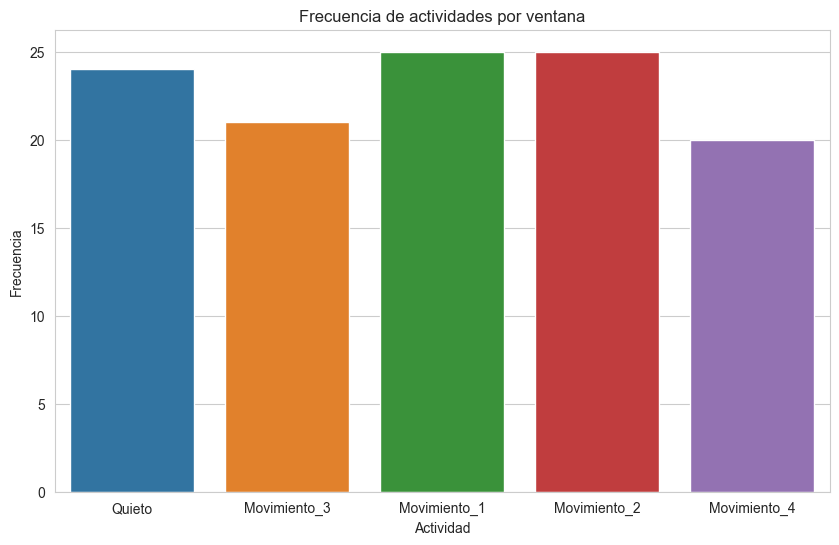

In [92]:
# Convertir el vector de actividades en un DataFrame de pandas
df = pd.DataFrame(test_labels, columns=['Actividad'])
sns.set_style('whitegrid')
# Crear el histograma utilizando sns.countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Actividad')
plt.title('Frecuencia de actividades por ventana')
plt.xlabel('Actividad')
plt.ylabel('Frecuencia')
plt.show()

In [93]:
act = np.array(train_labels)
act_test = np.array(test_labels)

### Regresión lineal

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
exactitud=[]
i=1
while i<1000:
    # standardization
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_data_lr = scaler.transform(X_train)
    X_test_data_lr = scaler.transform(X_test)
    # logistic regression model
    lr = LogisticRegression(C=i,random_state = 21)
    lr.fit(X_train_data_lr, act)
    act_pred = lr.predict(X_test_data_lr)
    exactitud.append(accuracy_score(act_test, act_pred))
    i+=1
x=np.linspace(1,1000,999)
plt.plot(x,exactitud)

KeyboardInterrupt: 

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)
# logistic regression model
lr = LogisticRegression(random_state = 21)
lr.fit(X_train_data_lr, act)
act_pred = lr.predict(X_test_data_lr)
print("Accuracy:", accuracy_score(act_test, act_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(act_test,act_pred))

Accuracy: 0.9304347826086956

 -------------Classification Report-------------

              precision    recall  f1-score   support

Movimiento_1       0.93      1.00      0.96        25
Movimiento_2       0.93      1.00      0.96        25
Movimiento_3       0.88      1.00      0.93        21
Movimiento_4       0.95      1.00      0.98        20
      Quieto       1.00      0.67      0.80        24

    accuracy                           0.93       115
   macro avg       0.94      0.93      0.93       115
weighted avg       0.94      0.93      0.93       115



### Matriz de confusión

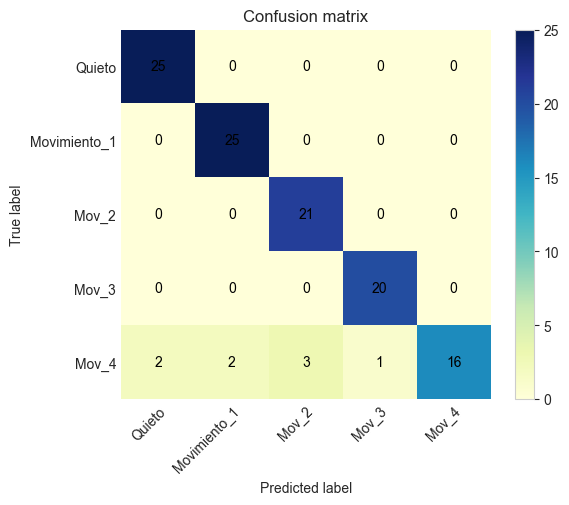

In [95]:
# Importar la librería necesaria
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Supongamos que tienes definidas las variables act_test y act_pred

# Generar la matriz de confusión
confusion_matrix = confusion_matrix(act_test, act_pred)

# Etiquetas de las clases
labels = ['Quieto', 'Movimiento_1', 'Mov_2', 'Mov_3', 'Mov_4']

# Crear figura y ejes
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap='YlGnBu')  # Cambiar el colormap aquí

# Mostrar todas las etiquetas de las clases
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotar las etiquetas para que sean legibles
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Mostrar los valores de cada celda
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="black")

# Configuración del título y etiquetas de los ejes
plt.title("Confusion matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Agregar la barra de referencia al lado
plt.colorbar(im, ax=ax)

# Eliminar las líneas divisorias entre los cuadrados
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis=u'both', which=u'both',length=0)
ax.grid(False)
plt.show()


### Random Forest

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd


# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_rf = scaler.transform(X_train)
X_test_data_rf = scaler.transform(X_test)


#Entrenar el modelo
modeloX = RandomForestClassifier(random_state = 21)
modeloX.fit(X_train_data_rf, act)

#Evaluar el modelo
act_pred_rf = modeloX.predict(X_test_data_rf)
accuracyX = accuracy_score(act_test, act_pred)
precision_recall_fscore = precision_recall_fscore_support(act_test,act_pred_rf,average=None)

print("Accuracy del modelo en X:", accuracyX)
print(classification_report(act_test,act_pred))

#Graficar precisionvsrecall
#

Accuracy del modelo en X: 0.9304347826086956
              precision    recall  f1-score   support

Movimiento_1       0.93      1.00      0.96        25
Movimiento_2       0.93      1.00      0.96        25
Movimiento_3       0.88      1.00      0.93        21
Movimiento_4       0.95      1.00      0.98        20
      Quieto       1.00      0.67      0.80        24

    accuracy                           0.93       115
   macro avg       0.94      0.93      0.93       115
weighted avg       0.94      0.93      0.93       115



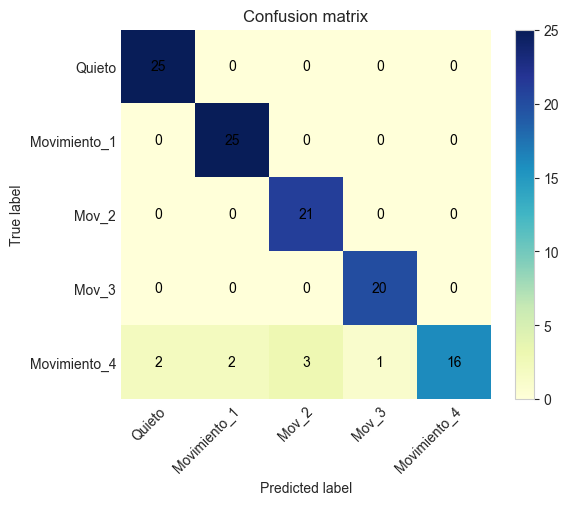

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


# Generar la matriz de confusión
confusion_matrix = confusion_matrix(act_test, act_pred)

# Etiquetas de las clases
labels = ['Quieto', 'Movimiento_1', 'Mov_2', 'Mov_3', 'Movimiento_4']

# Crear figura y ejes
fig, ax = plt.subplots()
im = ax.imshow(confusion_matrix, cmap='YlGnBu')  # Cambiar el colormap aquí

# Mostrar todas las etiquetas de las clases
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotar las etiquetas para que sean legibles
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Mostrar los valores de cada celda
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="black")

# Configuración del título y etiquetas de los ejes
plt.title("Confusion matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Agregar la barra de referencia al lado
plt.colorbar(im, ax=ax)

# Eliminar las líneas divisorias entre los cuadrados
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis=u'both', which=u'both',length=0)
ax.grid(False)
plt.show()

In [98]:
print(act_pred)

['Movimiento_3' 'Movimiento_3' 'Movimiento_3' 'Movimiento_3'
 'Movimiento_3' 'Movimiento_3' 'Movimiento_3' 'Movimiento_3'
 'Movimiento_3' 'Movimiento_3' 'Movimiento_3' 'Movimiento_3'
 'Movimiento_3' 'Movimiento_3' 'Movimiento_3' 'Movimiento_3'
 'Movimiento_3' 'Movimiento_3' 'Movimiento_3' 'Movimiento_3'
 'Movimiento_3' 'Movimiento_3' 'Movimiento_3' 'Movimiento_1'
 'Movimiento_1' 'Movimiento_1' 'Movimiento_1' 'Movimiento_1'
 'Movimiento_1' 'Movimiento_1' 'Movimiento_1' 'Movimiento_1'
 'Movimiento_1' 'Movimiento_1' 'Movimiento_1' 'Movimiento_1'
 'Movimiento_1' 'Movimiento_1' 'Movimiento_1' 'Movimiento_1'
 'Movimiento_1' 'Movimiento_1' 'Movimiento_1' 'Movimiento_1'
 'Movimiento_1' 'Movimiento_1' 'Movimiento_1' 'Movimiento_1'
 'Movimiento_1' 'Movimiento_1' 'Quieto' 'Quieto' 'Quieto' 'Quieto'
 'Quieto' 'Movimiento_3' 'Movimiento_2' 'Movimiento_2' 'Movimiento_2'
 'Movimiento_2' 'Movimiento_2' 'Movimiento_2' 'Movimiento_2'
 'Movimiento_2' 'Movimiento_2' 'Movimiento_2' 'Movimiento_2'
 'Movimie